## Imports

In [1]:
%run models/__init__.py

In [2]:
%run utils.py

In [3]:
%run utilsT.py

In [4]:
%run utilsTesting.py

In [5]:
%run -n train.py

In [6]:
device = get_torch_device()
device

device(type='cuda')

## Load model

In [7]:
run_name = "1121_180210_resnet_v3_wd0.5_Cardiomegaly"

In [8]:
model, model_name, optimizer, opt_name, chosen_diseases = load_model(BASE_DIR, run_name)
model = model.to(device)

In [9]:
_ = model.train(False)

## Load data

In [7]:
BATCH_SIZE = 4

In [16]:
%%time
dataset, dataloader = prepare_data(DATASET_DIR, "test", None, BATCH_SIZE, max_images=None)
n_images, n_diseases = dataset.size()
n_images, n_diseases

CPU times: user 32 s, sys: 280 ms, total: 32.3 s
Wall time: 32.3 s


(25596, 14)

## Load confusion matrix

In [17]:
train_cms = np.load(CMS_DIR + "/" + run_name + "_train.npy") # train, val or all
train_cms.shape

NameError: name 'run_name' is not defined

In [ ]:
val_cms = np.load(CMS_DIR + "/" + run_name + "_val.npy") # train, val or all
val_cms.shape

In [30]:
n_diseases, _, _ = train_cms.shape
n_diseases

1

Left: training
Right: validation


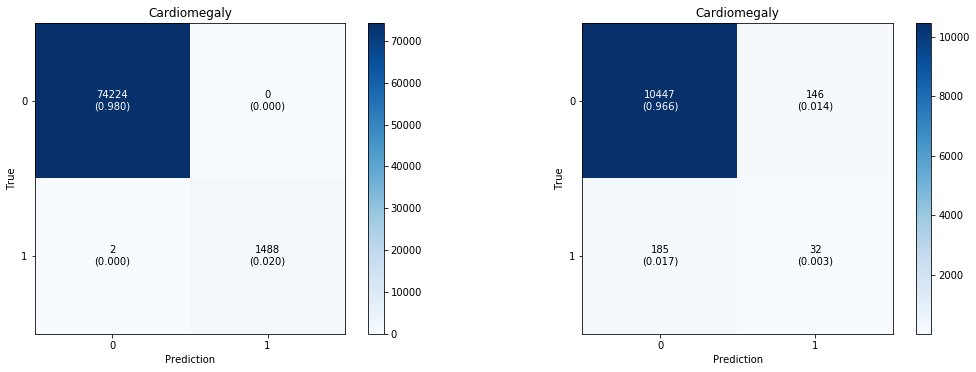

In [31]:
classes = [0, 1] # negative, positive

plt.figure(figsize=(18,80/14 * n_diseases))
plot_train_val_cms(train_cms, val_cms, classes, chosen_diseases, percentage=True)

## CM with names

Plot activations and bboxes

In [32]:
%run utils.py
%run utilsTesting.py

In [29]:
def get_cms_names(run_name, disease_name):
    fname = CMS_DIR + "/" + run_name + "_test_names"

    TP, FP, TN, FN, cm = load_cms_names(fname, disease_name)
    print(cm)
    return TP, FP, TN, FN, cm

In [30]:
def calculate_plot_activations(image_name, disease_name=None):
    image, gt, prediction, bboxes, activation = gen_image_with_bbox(model,
                                                                dataset,
                                                                image_name,
                                                                chosen_diseases,
                                                                device,
                                                               )

    plt.figure(figsize=(15, 5))

    plt.subplots_adjust(wspace=0.5)
    plt.subplot(1, 2, 1)
    plot_image_with_bbox(image, image_name, bboxes)
    
    plt.subplot(1, 2, 2)
    plot_activation(activation, prediction, gt, chosen_diseases, disease_name=disease_name)

### Cardiomegaly examples

In [22]:
run_name = "1121_180210_resnet_v3_wd0.5_Cardiomegaly"

In [23]:
model, model_name, optimizer, opt_name, chosen_diseases = load_model(BASE_DIR, run_name)
model = model.to(device)
_ = model.train(False)

In [24]:
TP, FP, TN, FN, cm = get_cms_names(run_name, "Cardiomegaly")

[[24048   479]
 [  852   217]]


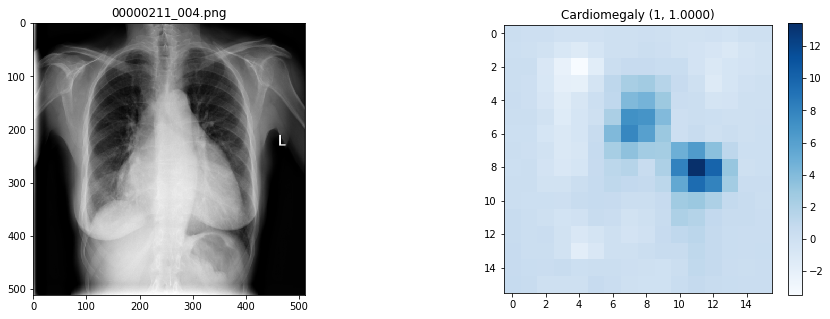

In [60]:
calculate_plot_activations(TP[2])

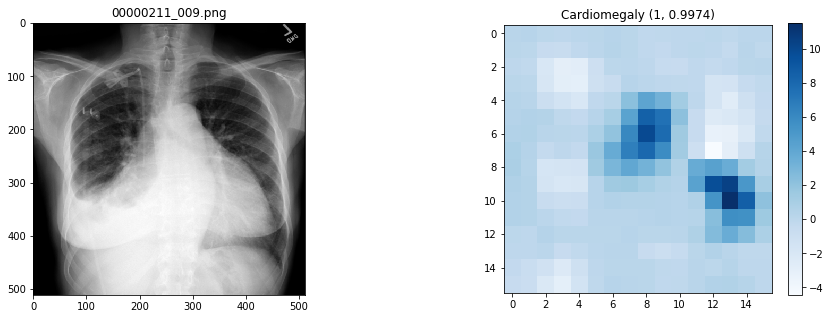

In [64]:
calculate_plot_activations(TP[6])

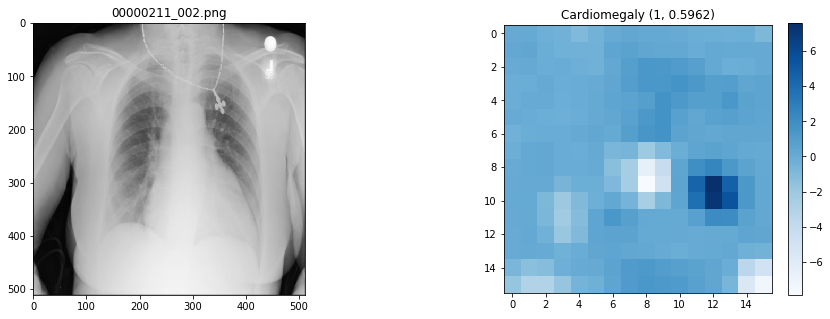

In [68]:
calculate_plot_activations(TP[1])

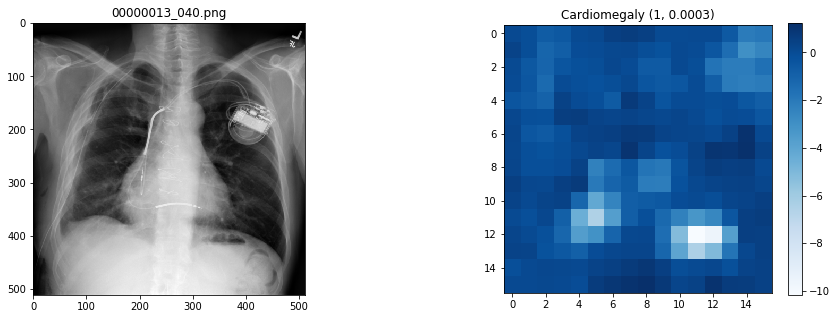

In [56]:
calculate_plot_activations(FN[7])

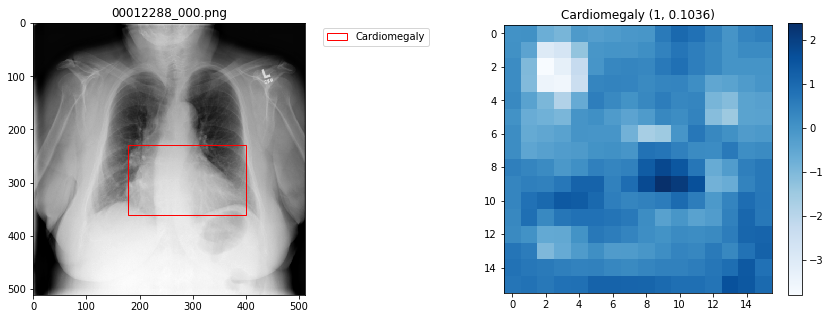

In [107]:
calculate_plot_activations("00012288_000.png")

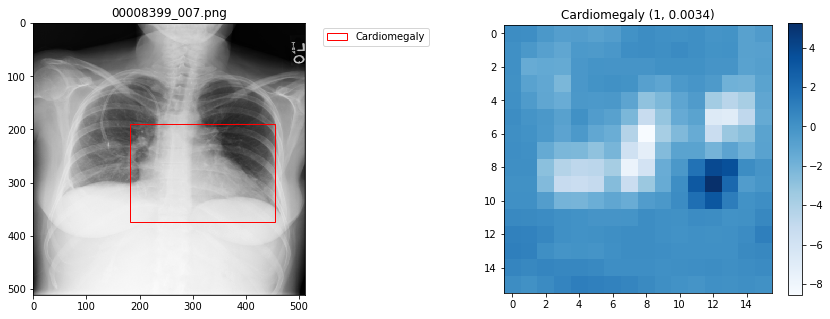

In [108]:
calculate_plot_activations("00008399_007.png")

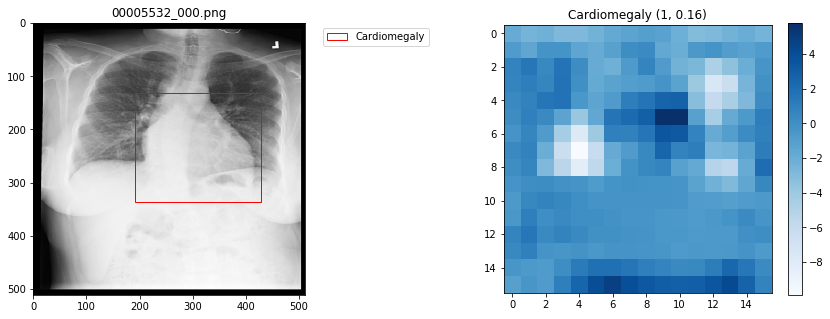

In [65]:
calculate_plot_activations("00005532_000.png")

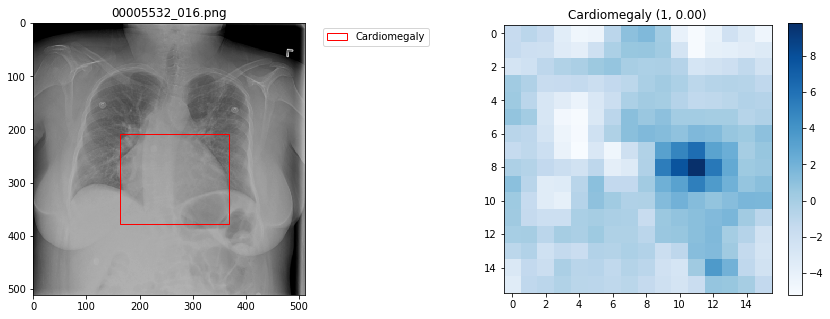

In [67]:
calculate_plot_activations("00005532_016.png")

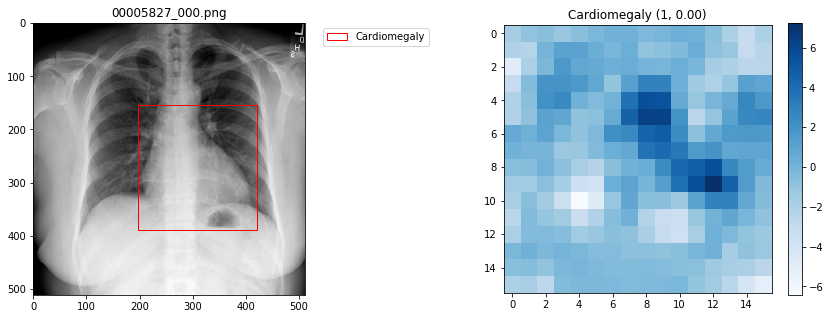

In [68]:
calculate_plot_activations("00005827_000.png")

### Pneumothorax examples

In [60]:
run_name = "1127_035613_resnet_v3_wd0.5_Pneumothorax"

In [61]:
model, model_name, optimizer, opt_name, chosen_diseases = load_model(BASE_DIR, run_name)
model = model.to(device)
_ = model.train(False)

In [62]:
TP, FP, TN, FN, cm = get_cms_names(run_name)

TP

[[88  4]
 [ 7  1]]


['00028876_023.png']

In [70]:
dataset.get_by_name(FP[0])

(tensor([[[ 0.4942,  0.4942,  0.4942,  ..., -0.4705, -0.4705, -0.4901],
          [ 0.4942,  0.4942,  0.4942,  ..., -0.4744, -0.4744, -0.4940],
          [ 0.4942,  0.4903,  0.4550,  ..., -0.4744, -0.4744, -0.4940],
          ...,
          [ 0.4629,  0.3491,  0.1884,  ..., -0.4469, -0.4469, -0.4744],
          [ 0.4746,  0.3609,  0.1962,  ..., -0.4352, -0.4352, -0.4665],
          [ 0.4746,  0.3648,  0.1923,  ..., -0.4195, -0.4195, -0.4509]],
 
         [[ 0.4942,  0.4942,  0.4942,  ..., -0.4705, -0.4705, -0.4901],
          [ 0.4942,  0.4942,  0.4942,  ..., -0.4744, -0.4744, -0.4940],
          [ 0.4942,  0.4903,  0.4550,  ..., -0.4744, -0.4744, -0.4940],
          ...,
          [ 0.4629,  0.3491,  0.1884,  ..., -0.4469, -0.4469, -0.4744],
          [ 0.4746,  0.3609,  0.1962,  ..., -0.4352, -0.4352, -0.4665],
          [ 0.4746,  0.3648,  0.1923,  ..., -0.4195, -0.4195, -0.4509]],
 
         [[ 0.4942,  0.4942,  0.4942,  ..., -0.4705, -0.4705, -0.4901],
          [ 0.4942,  0.4942,

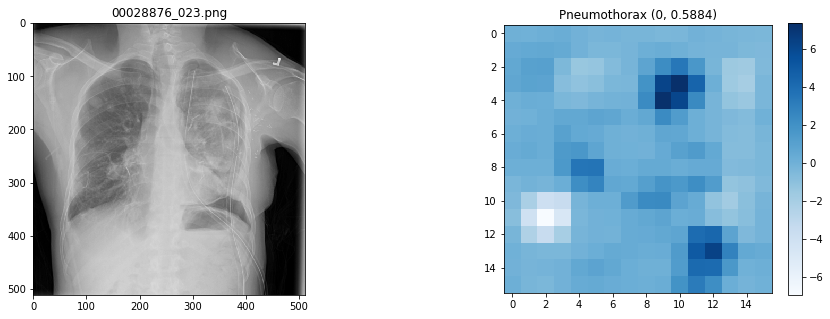

In [65]:
calculate_plot_activations(TP[0], disease_name="Pneumothorax")

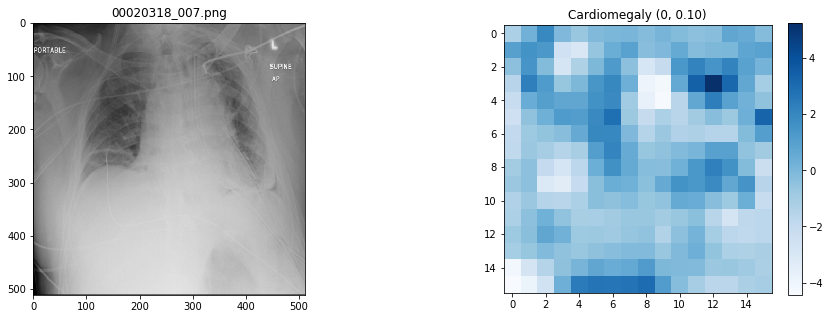

In [69]:
calculate_plot_activations("00020318_007.png")

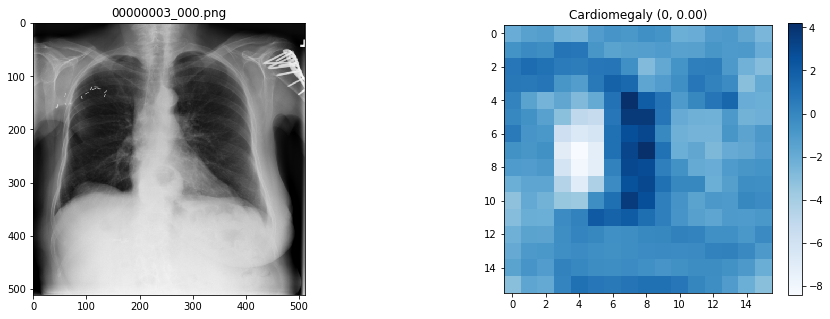

In [70]:
calculate_plot_activations("00000003_000.png")

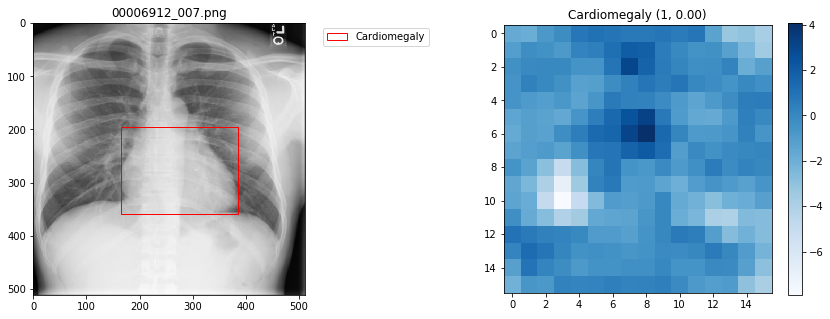

In [71]:
calculate_plot_activations("00006912_007.png")

In [86]:
n_images = dataset.size()[0]
n_images

25596

In [103]:
%run utils.py

In [104]:
n_images = BATCH_SIZE * 5

In [105]:
%%time

all_predictions, all_gts, image_names = predict_all(model, dataloader, device, n_images, n_diseases)

0 4 torch.Size([4, 1])
4 8 torch.Size([4, 1])
8 12 torch.Size([4, 1])
12 16 torch.Size([4, 1])
16 20 torch.Size([4, 1])
CPU times: user 1.32 s, sys: 56 ms, total: 1.37 s
Wall time: 595 ms


In [169]:
def calculate_all_cms_names(all_predictions, all_ground_truths, image_names):
    n_diseases = all_predictions.shape[1]

    def get_names(condition):
        condition = condition.flatten()
        return [image_name for image_name, is_good in zip(image_names, condition) if is_good]
    
    thresh = 0.5

    TP = get_names((all_predictions > thresh)  & (all_ground_truths > thresh))
    FP = get_names((all_predictions <= thresh) & (all_ground_truths > thresh))
    TN = get_names((all_predictions <= thresh) & (all_ground_truths <= thresh))
    FN = get_names((all_predictions > thresh)  & (all_ground_truths <= thresh))

    return {
        "TP": TP,
        "FP": FP,
        "TN": TN,
        "FN": FN,
    }

In [172]:
thresh = 0.5

In [186]:
((all_predictions > thresh)  & (all_gts > thresh)).flatten()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [170]:
test_cms_names = calculate_all_cms_names(all_predictions, all_gts, image_names)
test_cms_names

{'FN': [],
 'FP': [],
 'TN': ['00000003_000.png',
  '00000003_001.png',
  '00000003_002.png',
  '00000003_003.png',
  '00000003_004.png',
  '00000003_005.png',
  '00000003_006.png',
  '00000003_007.png',
  '00000013_000.png',
  '00000013_001.png',
  '00000013_002.png',
  '00000013_003.png',
  '00000013_004.png',
  '00000013_005.png',
  '00000013_006.png',
  '00000013_007.png',
  '00000013_008.png',
  '00000013_009.png',
  '00000013_010.png',
  '00000013_011.png'],
 'TP': []}